Import the libraries

In [1]:
import matplotlib.pyplot as plt
from load_data import load_dataset
from tokenizer import get_tokenizer, tokenize_texts
from bert_dataset import BertDataset
from train import get_model, train_model
from evaluate import evaluate_model
from sklearn.metrics import ConfusionMatrixDisplay

/Users/mksilva/Documents/personal/phd/nlp/unb-natural-language-processing/exercise-04/bert-implementation/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Load the base Dmoz-Health.csv

In [2]:
# Define input parameters for data loading
data_file = "data/Dmoz-Health.csv"  # Path to the input CSV file
text_column = "text"                # Name of column containing text data
label_column = "class"              # Name of column containing class labels

# Load and preprocess the dataset, splitting into train/val/test sets
train_texts, val_texts, test_texts, train_labels, val_labels, test_labels, label_encoder = load_dataset(
    data_file, text_column, label_column
)

Run the tokenizer

In [3]:
# Initialize the BERT tokenizer
tokenizer = get_tokenizer()

# Tokenize the text data for each split
# Tokenize training data and get analysis samples
train_encodings, train_sample_text, train_tokens, train_token_ids = tokenize_texts(train_texts, tokenizer)

# Tokenize validation and test data (only need encodings)
val_encodings = tokenize_texts(val_texts, tokenizer)[0]
test_encodings = tokenize_texts(test_texts, tokenizer)[0]

Print the token samples

In [4]:
# Print tokenization analysis for a training sample
print("\n **Train Tokenization Analysis** ")
print(f"Sample Text: {train_sample_text}")
print(f"Tokens: {train_tokens}")
print(f"Token IDs: {train_token_ids}\n")


 **Train Tokenization Analysis** 
Sample Text: MedlinePlus: Nicotine Oral Inhalation Features information about dosage, usage, warnings, and side effects. 
Tokens: ['med', '##line', '##pl', '##us', ':', 'nico', '##tine', 'oral', 'in', '##hala', '##tion', 'features', 'information', 'about', 'dos', '##age', ',', 'usage', ',', 'warnings', ',', 'and', 'side', 'effects', '.']
Token IDs: [19960, 4179, 24759, 2271, 1024, 19332, 10196, 8700, 1999, 19531, 3508, 2838, 2592, 2055, 9998, 4270, 1010, 8192, 1010, 16234, 1010, 1998, 2217, 3896, 1012]



Create the datasets

In [5]:
# Create PyTorch datasets for model training
train_dataset = BertDataset(train_encodings, train_labels)
val_dataset = BertDataset(val_encodings, val_labels)
test_dataset = BertDataset(test_encodings, test_labels)

Create the model

In [6]:
# Load model
num_labels = len(label_encoder.classes_)
model = get_model(num_labels)

# Train model
trainer = train_model(model, train_dataset, val_dataset, tokenizer)

# Evaluate model
accuracy, f1_micro, f1_macro, conf_matrix = evaluate_model(trainer, test_dataset, test_labels, label_encoder)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/mksilva/Documents/personal/phd/nlp/unb-natural-language-processing/exercise-04/bert-implementation/.venv/lib/python3.12/site-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/Users/mksilva/Documents/personal/phd/nlp/unb-natural-language-processing/exercise-04/bert-implementation/train.py:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy
1,0.436800,0.474735,0.863142
2,0.653800,0.508825,0.881804
3,0.233000,0.520616,0.897356


Show the results

Accuracy: 0.9128
F1-score (Micro): 0.9128
F1-score (Macro): 0.9100
Confusion Matrix:
[[111   0   0   0   0   2   1   0   0   0   1   0   0]
 [  0  73   0   3   3   4   0   2   0   1   0   0   0]
 [  0   1 114   0   0   0   0   2   0   1   0   0   0]
 [  2   2   2  83   3   1   0   1   1   1   0   1   0]
 [  1   1   0   5  68   2   2   0   1   1   5   0   0]
 [  1   3   0   5   0  91   3   1   0   2   2   0   1]
 [  1   0   0   0   1   0 104   0   0   0   4   1   0]
 [  0   1   0   1   0   0   0  81   0   0   0   0   0]
 [  2   2   0   0   1   2   0   0  98   0   0   0   0]
 [  1   1   0   0   2   1   2   0   0  89   0   2   0]
 [  0   0   0   2   0   1   1   0   0   1  94   0   0]
 [  0   2   0   0   2   1   0   0   1   1   0  89   1]
 [  1   0   0   0   3   0   0   0   1   0   0   0  98]]


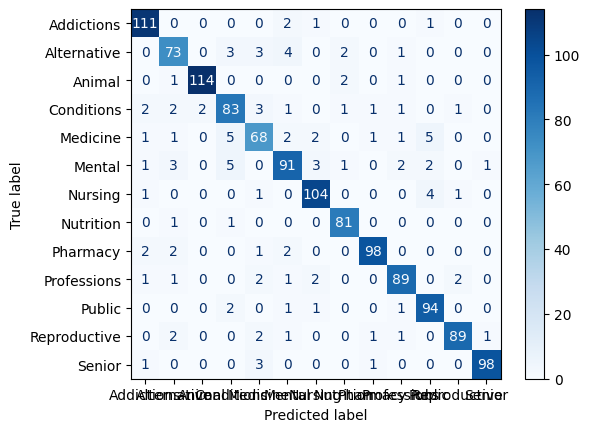

In [7]:
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score (Micro): {f1_micro:.4f}")
print(f"F1-score (Macro): {f1_macro:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()
